# spectral clustering

In [24]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from matplotlib import animation
from IPython.display import HTML

In [226]:
class spectral_clustering:
    
    def __init__(self, data, ground, cluster_num, varience=4):
        
        with open(data) as f:
            lines = f.readlines()
        self.points = np.array([[float(x) for x in line.strip().split(" ")] for line in lines])

        with open(ground) as f:
            lines = f.readlines()
        self.labels = np.array([float(line.strip()) for line in lines])
        
        self.cluster_num = cluster_num
        self.varience = varience
        
        self.A = self.calc_gran_mat(self.points)
        self.L = self.calc_laplacian(self.A)
        
        eig_val, eig_vec = eigs(self.L, k=self.cluster_num)
        self.X = eig_vec.real
        
        rows_norm = np.linalg.norm(self.X, axis=1)
        self.Y = (self.X.T / rows_norm).T
        
        self.predicts = self.k_means(self.Y)
    

    def calc_laplacian(self, A):
        D = np.diag(np.array([math.pow(np.sum(row), -0.5) for row in A]))
        return D.dot(A).dot(D)
        
    def calc_gran_mat(self, points):
        n = len(points)
        mat = np.zeros((n, n))
        
        for i in range(n):
            for j in range(n):
                if j == i:
                    continue
                if j > i:
                    mat[i][j] = self.RBF_kernel(points[i], points[j], -1.0 / 2.0 / self.varience / self.varience)
                if j < i:
                    mat[i][j] = mat[j][i]

        return mat
     
    def RBF_kernel(self, x1, x2, gamma):
        return math.exp(gamma * (math.pow(x1[0]-x2[0], 2) + math.pow(x1[1]-x2[1], 2)))
    
    def k_means(self, X):
        predicts = [0 for i in range(len(X))]
        centroids = np.array([X[idx] for idx in random.sample(range(len(X)), self.cluster_num)])
        
        error = 0.0
        converged = False
        
        while not converged:
            # E step
            for i in range(len(X)):
                x = X[i]
                distance = np.linalg.norm(np.tile(x, (self.cluster_num, 1)) - centroids, axis=1)
                predicts[i] = np.argmax(distance)

            # M step
            prev_centroids = centroids
            prev_error = error

            predicts_one_hot = np.zeros((X.shape[0], self.cluster_num))
            predicts_one_hot[np.arange(X.shape[0]), predicts] = 1
            cluster_count = np.sum(predicts_one_hot, axis=0)
            centroids = predicts_one_hot.T.dot(X) / cluster_count
            
            error = np.sum(np.linalg.norm(prev_centroids - centroids, axis=1))
            if prev_error - error == 0:
                converged = True
                
        return predicts


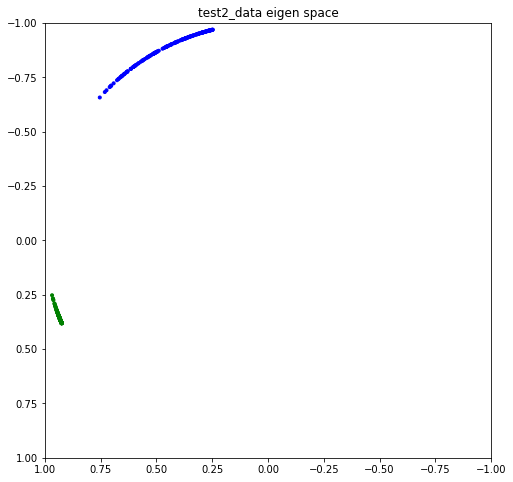

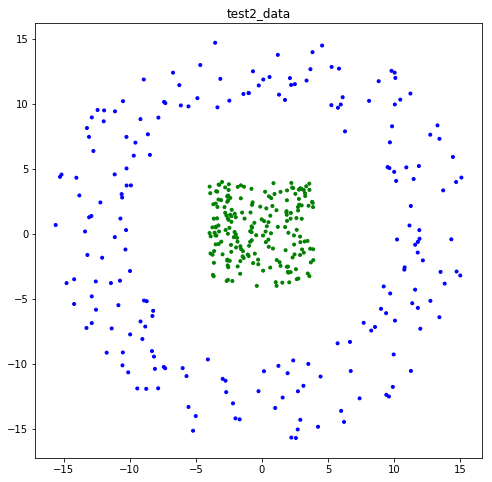

In [237]:
model = spectral_clustering("data/test2_data.txt", "data/test2_ground.txt", cluster_num=2, varience=3)
color_list = ["green", "blue", "red", "orange", "yellow", "purple", "black"]
colors = [color_list[predict] for predict in model.predicts]

plt.figure(figsize=(8, 8))
plt.axis((1, -1, 1, -1))
plt.title('test2_data eigen space')
x, y = zip(*model.Y)
plt.plot(x, y)
x, y = zip(*model.Y)
plt.scatter(x, y, color=colors, marker='.')

plt.figure(figsize=(8, 8))
plt.title('test2_data')
x, y = zip(*model.points)
plt.scatter(x, y, color=colors, marker='.')

plt.show()

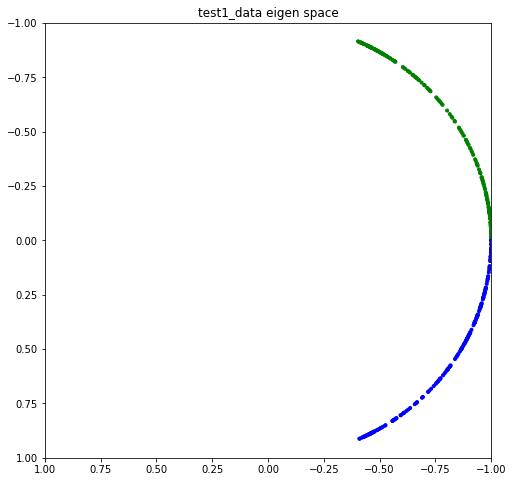

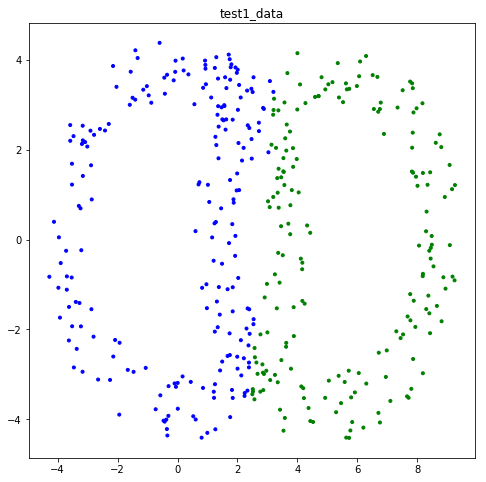

In [242]:
model = spectral_clustering("data/test1_data.txt", "data/test1_ground.txt", cluster_num=2)

plt.figure(figsize=(8, 8))
plt.axis((1, -1, 1, -1))
plt.title('test1_data eigen space')
x, y = zip(*model.Y)
plt.scatter(x, y, color=colors, marker='.')

plt.figure(figsize=(8, 8))
plt.title('test1_data')
x, y = zip(*model.points)
plt.scatter(x, y, color=colors, marker='.')

plt.show()